# Data overview

## Import data

In [2]:
import warnings
from pathlib import Path

import numpy as np
import pandas as pd
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from tqdm import tqdm


warnings.filterwarnings('ignore')

In [3]:
project_dir = Path("/media/eden/sandisk/projects/icecube/")
data_dir = project_dir / "input" / "icecube" / "icecube-neutrinos-in-deep-ice"
train_meta = data_dir / "train_meta.parquet"
batch_one = data_dir / "train" / "batch_1.parquet"
geometry_table = data_dir / "sensor_geometry.csv"
submission = data_dir / "sample_submission.parquet"

In [3]:
df_batch = pl.read_parquet(batch_one)


In [6]:
df_batch["event_id"].n_unique()

200000

In [3]:
df_train_meta = pl.read_parquet(train_meta)
df_batch = pl.read_parquet(batch_one)
df_sensor = pl.read_csv(geometry_table)
df_submission = pl.read_parquet(submission)

In [4]:
import polars as pl
df_batch = pl.read_parquet(batch_one)

In [28]:
(df_batch
    .groupby("event_id")
    .agg([
        pl.col("auxiliary").sum().alias("aux_sum"),
        pl.col("auxiliary").count().alias("n_pulse"),
    ])
    .select([
        pl.col("event_id"),
        (pl.col("aux_sum") / pl.col("n_pulse")).alias("p_aux"),
        pl.col("n_pulse"),
    ])
    # .filter(pl.col("aux_sum") > 0.8)
)


event_id,p_aux,n_pulse
i64,f64,u32
65536,0.72549,51
245760,0.761905,63
311296,0.738095,42
458752,0.252212,226
1294336,0.75,60
1392640,0.764706,34
1867776,0.333333,159
2015232,0.709677,93
2048000,0.837209,43


In [20]:
df_batch

sensor_id,time,charge,auxiliary,event_id
i16,i64,f64,bool,i64
3918,5928,1.325,true,24
4157,6115,1.175,true,24
3520,6492,0.925,true,24
5041,6665,0.225,true,24
2948,8054,1.575,true,24
860,8124,0.675,true,24
2440,8284,1.625,true,24
1743,8478,0.775,true,24
3609,8572,1.025,true,24


In [8]:
df_batch.filter(pl.col("auxiliary") == False).shape[0] / df_batch.shape[0]

0.7182115828245165

In [5]:
df_train_meta.head(10)

batch_id,event_id,first_pulse_index,last_pulse_index,azimuth,zenith
i64,i64,i64,i64,f64,f64
1,24,0,60,5.029555,2.087498
1,41,61,111,0.417742,1.549686
1,59,112,147,1.160466,2.401942
1,67,148,289,5.845952,0.759054
1,72,290,351,0.653719,0.939117
1,77,352,401,0.011372,1.295371
1,79,402,717,3.533397,2.479947
1,82,718,762,5.252108,0.672366
1,121,763,803,3.084929,2.06588


In [7]:
df_batch.head(10)

sensor_id,time,charge,auxiliary,event_id
i16,i64,f64,bool,i64
3918,5928,1.325,true,24
4157,6115,1.175,true,24
3520,6492,0.925,true,24
5041,6665,0.225,true,24
2948,8054,1.575,true,24
860,8124,0.675,true,24
2440,8284,1.625,true,24
1743,8478,0.775,true,24
3609,8572,1.025,true,24


In [8]:
df_batch["auxiliary"].value_counts()

auxiliary,counts
bool,u32
false,23551893
true,9240523


In [9]:
df_train_meta["event_id"].n_unique()

131953924

In [10]:
df_sensor.head(10)

sensor_id,x,y,z
i64,f64,f64,f64
0,-256.14,-521.08,496.03
1,-256.14,-521.08,479.01
2,-256.14,-521.08,461.99
3,-256.14,-521.08,444.97
4,-256.14,-521.08,427.95
5,-256.14,-521.08,410.93
6,-256.14,-521.08,393.91
7,-256.14,-521.08,376.88
8,-256.14,-521.08,359.86


In [11]:
df_submission.head(10)

event_id,azimuth,zenith
i64,i64,i64
2092,1,1
7344,1,1
9482,1,1


## Number of pulse

In [14]:
df_npulse = df_batch.groupby("event_id").count().rename({"count": "n_pulse"}).sort(by="n_pulse")

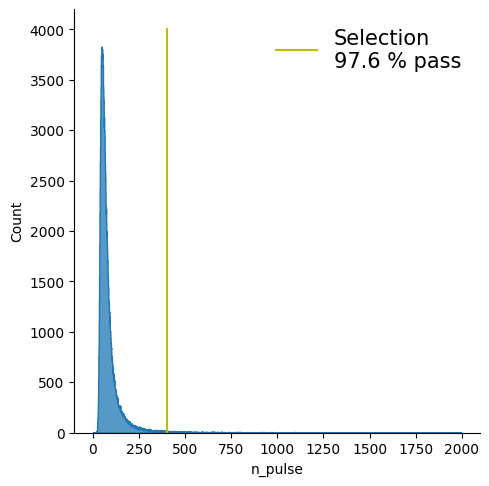

In [27]:
sns.displot(df_npulse, x="n_pulse", element="step", bins=np.arange(2000))
plt.plot(np.repeat(400,2), [0, 4000], label = f'Selection\n{np.round((sum(df_npulse["n_pulse"]<= 400)/len(df_npulse))*100, 1)} % pass', color="y")
plt.legend(frameon = False, fontsize = 15)


Most events have pulses less than 500.

In [39]:
max_pulse_event = df_npulse.select(pl.col("event_id").last()).item()

In [45]:
df_batch.filter(pl.col("event_id") == max_pulse_event)["sensor_id"].value_counts().sort("counts", reverse=True)

sensor_id,counts
i16,u32
2923,369
2712,278
2924,250
2217,243
2715,241
2388,240
2743,239
2146,232
1783,229


So one sensor may detect more than 1 pulse.

## One event

In [12]:
df_batch = df_batch.with_columns(pl.col("sensor_id").cast(pl.Int64))
df_merged_pulse = df_batch.join(df_sensor, on="sensor_id", how="left").join(df_train_meta, on="event_id", how="left")

In [13]:
def az2xyz(a, z):
    return (
        np.cos(a) * np.sin(z),
        np.sin(a) * np.cos(z),
        np.cos(z),
    )
    
def get_lines(a, z):
    x, y, z = az2xyz(a, z)
    return np.array(
        [[x, -x],
        [y, -y],
        [z, -z],]
    )

In [14]:
sample = df_merged_pulse.filter(pl.col("event_id") == 67)
azimuth, zenith = sample.get_column("azimuth")[0], sample.get_column("zenith")[0]
lines = get_lines(azimuth, zenith) * 1e3

sample = sample.join(
    sample.groupby("sensor_id").agg(pl.col("charge").sum().alias("charge_sum")),
    on="sensor_id",
    how="left"
)


In [15]:
fig_aux = px.scatter_3d(
    sample.filter(pl.col("auxiliary") == True).to_pandas(),
    x="x",
    y="y",
    z="z",
    color_discrete_sequence=["red"],
    size="charge_sum",
    color_continuous_scale=px.colors.colorbrewer.Reds,
)

fig_non_aux = px.scatter_3d(
    sample.filter(pl.col("auxiliary") == False).to_pandas(),
    x="x",
    y="y",
    z="z",
    color_discrete_sequence=["blue"],
    size="charge_sum",
    color_continuous_scale=px.colors.colorbrewer.Reds,
)
fig = go.Figure(data = fig_aux.data + fig_non_aux.data)
fig.add_trace(
    go.Scatter3d(x=lines[0], y=lines[1], z=lines[2], mode="lines", name="line")
)
fig.show()

## Sensor map

In [16]:
px.scatter_3d(
    df_sensor.to_pandas(),
    x="x",
    y="y",
    z="z",
    size="sensor_id",
    title="IceCube sensor"
)